In [6]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

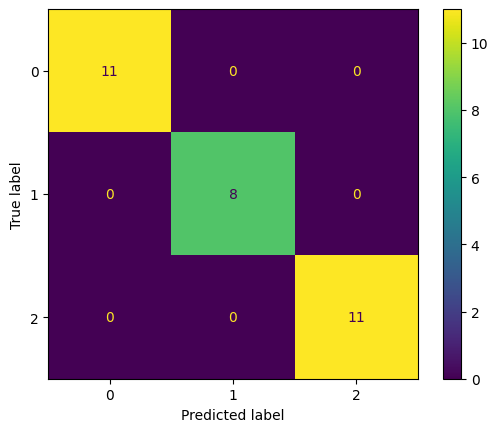

In [5]:
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier().fit(X_train, y_train)
y_pred = clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [7]:
def metrics_from_confusion_matrix(cm):
    per_class = []
    total = np.sum(cm)
    accuracy = np.trace(cm) / total

    for i in range(len(cm)):
        TP = cm[i, i]
        FP = cm[:, i].sum() - TP
        FN = cm[i, :].sum() - TP
        TN = total - (TP + FP + FN)

        precision = TP / (TP + FP) if (TP + FP) != 0 else 0
        recall = TP / (TP + FN) if (TP + FN) != 0 else 0
        specificity = TN / (TN + FP) if (TN + FP) != 0 else 0
        f1 = 2 * precision * recall / (precision + recall) if (precision + recall) else 0

        per_class.append({
            'class': i,
            'TP': TP, 'FP': FP, 'FN': FN, 'TN': TN,
            'Precision': precision,
            'Recall': recall,
            'Specificity': specificity,
            'F1': f1
        })

    return accuracy, per_class

In [8]:
accuracy, details = metrics_from_confusion_matrix(cm)

print(f"Overall Accuracy: {accuracy:.2f}")
for d in details:
    print(f"Class {d['class']} -> Precision: {d['Precision']:.2f}, Recall: {d['Recall']:.2f}, F1: {d['F1']:.2f}")

Overall Accuracy: 1.00
Class 0 -> Precision: 1.00, Recall: 1.00, F1: 1.00
Class 1 -> Precision: 1.00, Recall: 1.00, F1: 1.00
Class 2 -> Precision: 1.00, Recall: 1.00, F1: 1.00
